In [118]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from market import IntegratedMarketModel

In [119]:
n_firms = 10 
n_consumers = 500
n_chars = 2
T = 1
s = 666

In [120]:
model = IntegratedMarketModel(
        n_firms, 
        n_consumers, 
        n_chars, 
        T, 
        seed=s
    )
model.demand_side_optimisation()


In [121]:
prices_optimal = model.prices.flatten()
v_p = model.v_p
product_cars = model.produc_chars
shares = model.market_shares.flatten()
print(product_cars)
print(prices_optimal)
print(v_p)
print(shares)

[[1.         3.88586965 5.76748174]
 [1.         4.1345461  4.72384327]
 [1.         4.6252596  3.22384198]
 [1.         4.20031637 4.11809012]
 [1.         5.28722865 3.59245552]
 [1.         4.43865792 4.89677598]
 [1.         3.47584868 5.82343285]
 [1.         3.3924001  5.46069324]
 [1.         4.44518182 3.78921447]
 [1.         3.73926932 5.60973067]]
[1.85575048 1.94683077 2.22178405 2.10618138 1.97766705 1.89093488
 1.88894815 1.99897619 2.13716193 1.95531928]
[[ 8.24188083e-01]
 [ 4.79966003e-01]
 [ 1.17346801e+00]
 [ 9.09048069e-01]
 [-5.71721452e-01]
 [-1.09497268e-01]
 [ 1.90282649e-02]
 [-9.43761065e-01]
 [ 6.40573153e-01]
 [-7.86443172e-01]
 [ 6.08869993e-01]
 [-9.31011849e-01]
 [ 9.78222248e-01]
 [-7.36918061e-01]
 [-2.98732618e-01]
 [-4.60587375e-01]
 [-1.08879299e+00]
 [-5.75770746e-01]
 [-1.68290077e+00]
 [ 2.29185248e-01]
 [-1.75662522e+00]
 [ 8.44632619e-01]
 [ 2.77219863e-01]
 [ 8.52901533e-01]
 [ 1.94599603e-01]
 [ 1.31063772e+00]
 [ 1.54384360e+00]
 [-5.29048024

In [122]:
def compute_share_check(v_p, price, produc_chars, n_firms, mu=0.5, omega=0.2, beta1=2, beta2=-0.3, beta3=-0.3, n_consumers=n_consumers):
    price_r = np.reshape(price, (1, n_firms))
    alpha_0 = -np.exp(mu + (omega)**2/2)

    beta = np.array([beta1,beta2, beta3])
    mean_indirect_utility = produc_chars@beta + alpha_0*price

    mean_indirect_utlity_for_utility = np.repeat(mean_indirect_utility, n_consumers, axis=0)

    alpha_i = np.reshape((-(np.exp(mu + omega*v_p))+np.exp(mu + (omega)**2/2)), (n_consumers, 1))
    random_coeff = np.ravel((alpha_i*price_r).T)


    u = mean_indirect_utlity_for_utility + random_coeff
    u_r = np.reshape(u, (n_firms, n_consumers))
    sum_u = np.sum(np.exp(u_r), axis =0)

    all_probs = np.exp(u_r)/(1 + sum_u)
    market_shares = np.sum(all_probs, axis=1)/n_consumers

    return market_shares, 1 - np.sum(market_shares)

In [123]:

max_share = []
min_share = []
outside_good_share = []

range_values = np.arange(-5, 15.25, 0.25)


for i in range_values:
    shares_check, outside_share = compute_share_check(v_p, prices_optimal, product_cars,n_firms, beta3=i)
    max_share_in = np.max(shares_check)
    min_share_in = np.min(shares_check)
    max_share.append(max_share_in)
    min_share.append(min_share_in)
    outside_good_share.append(outside_share)


print(max_share)
print(min_share)
print(outside_good_share)

[5.739866081088334e-09, 1.2850675281708705e-08, 2.877068033222482e-08, 6.4413113973547e-08, 1.442110089977222e-07, 3.228660904984821e-07, 7.228467237048319e-07, 1.6183387603766552e-06, 3.6231916816601594e-06, 8.111663859490213e-06, 1.8160202398148875e-05, 4.065480716871705e-05, 9.100264489265762e-05, 0.00020364311934372185, 0.00045535598533685297, 0.0010160565688974333, 0.0022537006667090135, 0.004913160861650612, 0.010192755767366996, 0.022700456582590765, 0.062454659659625676, 0.12282612559168567, 0.18003722743741826, 0.22160960096279667, 0.25160705459666416, 0.27549237184920994, 0.29598838515060344, 0.31424151098598685, 0.3308059504568592, 0.34602099353808863, 0.36013004153892325, 0.37331962572757676, 0.3857358854098089, 0.39749426305784885, 0.40868644690077405, 0.4193856621497521, 0.4296507454747905, 0.4395292810415659, 0.4490600158140646, 0.45827472635906374, 0.4671996697052423, 0.47585671798536805, 0.48426425105743115, 0.49243786223172814, 0.5003909183014947, 0.5081350049850216, 

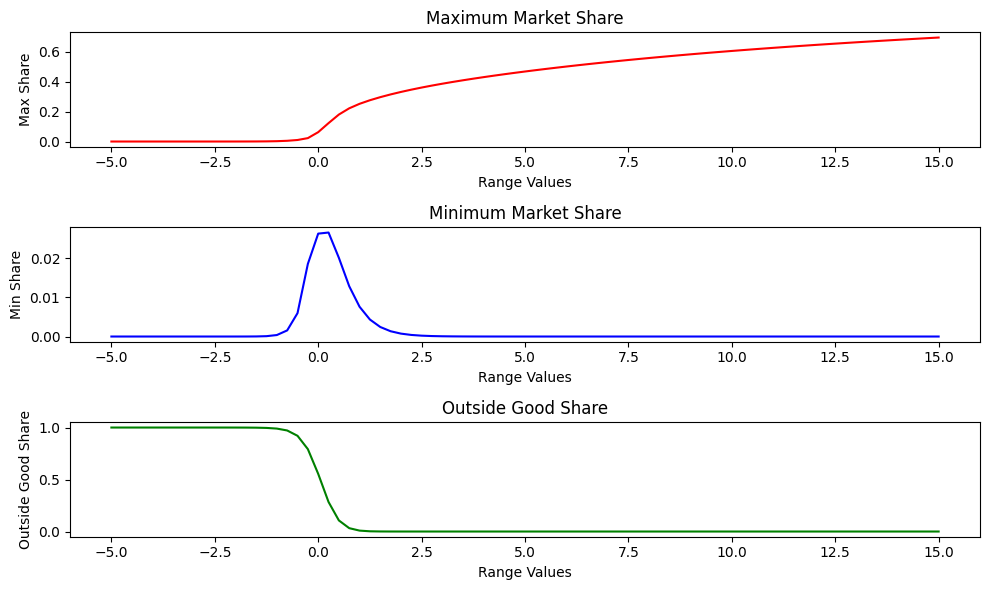

In [125]:
# Create plots
plt.figure(figsize=(10, 6))

# Plot max_share
plt.subplot(3, 1, 1)
plt.plot(range_values, max_share, color='red')
plt.title("Maximum Market Share")
plt.xlabel("Range Values")
plt.ylabel("Max Share")

# Plot min_share
plt.subplot(3, 1, 2)
plt.plot(range_values, min_share, color='blue')
plt.title("Minimum Market Share")
plt.xlabel("Range Values")
plt.ylabel("Min Share")

# Plot outside_good_share
plt.subplot(3, 1, 3)
plt.plot(range_values, outside_good_share, color='green')
plt.title("Outside Good Share")
plt.xlabel("Range Values")
plt.ylabel("Outside Good Share")

plt.tight_layout()
plt.show()